Data Description:  
The file Bank.xls contains data on 5000 customers. 
The data include customer demographic information (age, income, etc.), 
the customer's relationship with the bank (mortgage, securities account, etc.), and 
the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) 
accepted the personal loan that was offered to them in the earlier campaign.

Domain:  Banking
    
Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting 
its liability customers to personal loan customers (while retaining them as depositors). 
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the 
success ratio with minimal budget.

Attribute Information: 
1. ID           : Customer ID                                                                          
2. Age         : Customer's age in completed years 
3. Experience  : #years of professional experience   
4. Income   : Annual income of the customer (\$000) 
5. zipping Code  : Home Address ZIP code. 
6. Family   : Family size of the customer  
7. CCAvg  : Avg. spending on credit cards per month (\$000) 
8. Education  : Education Level. 1: Undergrad; 2: Graduate;    3: Advanced/Professional  
9. Mortgage  : Value of house mortgage if any. (\$000) 
10. Personal Loan  : Did this customer accept the personal loan offered in the                  last campaign? 
11. Securities Account : Does the customer have a securities account with the bank? 
12. CD Account  : Does the customer have a certificate of deposit (CD)    account with the bank? 
13. Online   : Does the customer use internet banking facilities?  
14. Credit card  : Does the customer use a credit card issued by 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
numpy.random.seed(1234)
RandomState = numpy.random.seed(1234)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f
# In[8]:


class Perform_EDA():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        
    def EDA_Corr(df):
        """This gives output as Covariance matrix and feature wise uniquess i.e how much its statistically
        independent. This is done with default range of corr between +0.5 to -0.6"""
        corr = df.corr()
        index = corr.columns
        Output = []
        for i in range(0,len(index)):
            i = index[i]
            Pos = corr.index[(corr[i] >= 0.5)].tolist()
            No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
            Neg = corr.index[(corr[i] <= -0.5)].tolist()
            leng_u = len(No)
            leng_pos = len(Pos)
            leng_neg = len(Neg)
            Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
            Output.append(Out)
        fig, ax = matplot.subplots(figsize=(20,10))  
        sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
        Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
        return Output1

    def EDA(df):
        """This function creates a dataframe transpose with 5 point summary, Kurtosis, Skewness, IQR, Range
        Total count of missing values, % missing values against the total records"""
        EDA = pandas.DataFrame((df.describe()).T)
        EDA["Kurtosis"] = df.kurtosis()
        EDA["Skewness"] = df.skew()
        EDA["Range"] = EDA['max'] -  EDA['min']
        EDA["IQR"] = EDA['75%'] -  EDA['25%']
        EDA["Missing Values"] = df.shape[0] - EDA["count"]
        print("Total Missing Values = ", EDA['Missing Values'].sum(), "Data Points, Contributing to ", 
              (round(((EDA['Missing Values'].sum())/len(df)),2))*100,"%")
        print("Columns with values as 0\n\n",pandas.Series((EDA.loc[EDA['min'] == 0]).index),'\n')
        indices = EDA[EDA['min'] == 0].index
        print("\nColumns with numnber of Zeros\n")
        for i in range(0,len(indices)):
            j = indices[i]
            print(j,"   =",(df[j].value_counts())[0])
        return EDA
    
    def NaN_treatment_median(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Missing_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['Missing Values'] != 0]).index)
        len(Missing_Value_Columns)
        for i in range(0,len(Missing_Value_Columns)):
            df[Missing_Value_Columns[i]].fillna(df[Missing_Value_Columns[i]].median(), inplace = True)
        return df
    
    def NaN_treatment_mean(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Missing_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['Missing Values'] != 0]).index)
        len(Missing_Value_Columns)
        for i in range(0,len(Missing_Value_Columns)):
            df[Missing_Value_Columns[i]].fillna(df[Missing_Value_Columns[i]].mean(), inplace = True)
        return df
    
    def Zero_Values_Treatment_Median(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Zero_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['min'] == 0]).index)
        for i in range(0,len(Zero_Value_Columns)):
            df[Zero_Value_Columns[i]].replace(0,(df[Zero_Value_Columns[i]]).median(), inplace = True)
        return df
    
    def Zero_Values_Treatment_Mean(df):
        EDA_Summary = Perform_EDA.EDA(df)
        Zero_Value_Columns = pandas.Series((EDA_Summary.loc[EDA_Summary['min'] == 0]).index)
        for i in range(0,len(Zero_Value_Columns)):
            df[Zero_Value_Columns[i]].replace(0,(df[Zero_Value_Columns[i]]).mean(), inplace = True)
        return df

    def Missing_Values(df):
        for i in range(0,len(df.columns)):
            i = df.columns[i]
            print(i,'\n\n',df[i].value_counts(),'\n\n',(df[i].value_counts()).sum(),'\n\n')
        return Missing_Values
    
    def EDA_target(df,Y):
        DF = pandas.DataFrame(Y.value_counts())
        DF['Contribution'] = round(((DF['class'])/len(df)*100),2)
        Missing_values = len(df) - (Y.value_counts()).sum()
        print("Total Missing Values = ", Missing_values, "Data Points, Contributing to ",
              round(((Missing_values/len(df))*100),2),"%")
        return DF
    
    def univariate_plots(Source):
        print("Columns that are int32,int64 = ",Source.select_dtypes(include=['int32','int64']).columns)
        print("Columns that are flaot32,float64 = ",Source.select_dtypes(include=['float64']).columns)
        print("Columns that are objects = ",Source.select_dtypes(include=['object']).columns)
        a = pandas.Series(Source.select_dtypes(include=['int32','int64']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            f, axes = matplot.subplots(1, 2, figsize=(10, 10))
            sns.boxplot(Source[a[j]], ax = axes[0])
            sns.distplot(Source[a[j]], ax = axes[1])
            matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

        a = pandas.Series(Source.select_dtypes(include=['float64']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            matplot.Text('Figure for float64')
            f, axes = matplot.subplots(1, 2, figsize=(10, 10))
            sns.boxplot(Source[a[j]], ax = axes[0])
            sns.distplot(Source[a[j]], ax = axes[1])
            matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

        a = pandas.Series(Source.select_dtypes(include=['object']).columns)
        leng = len(a)
        for j in range(0,len(a)):
            matplot.subplots()
            sns.countplot(Source[a[j]])
            
    def Impute_Outliers(df,method = "median",threshold = 0.1):
            """Pls input the method as a string - mean or median with 'm' in lower case
            Default method = median
            Detault threshold = 0.1
            The function will give 3 outputs 
            1. df data imputed based on the value provided
            2. Outlier impact as a printed message with % of records impacted
            """
            df_Columns = df.columns
            Subset_Columns = pandas.Series(df.select_dtypes(include=['int32','int64','float64','float32']).columns)

            Subset = df[Subset_Columns]

            IQR = Subset.quantile(0.75) - Subset.quantile(0.25)

            Q3_values = Subset.quantile(0.75) + (1.5 * IQR)
            Q1_values = Subset.quantile(0.25) - (1.5 * IQR)

            Q1 = []
            for i in range(1,len(Subset_Columns)+1):
                c = "Q1"+str(i)
                Q1.append(c)

            Q3 = []
            for i in range(1,len(Subset_Columns)+1):
                c = "Q3"+str(i)
                Q3.append(c)

            df[Q3] = Subset > Q3_values[0:len(Subset_Columns)]
            df[Q1] = Subset < Q1_values[0:len(Subset_Columns)]

            Q1_Outliers = []
            Q1_j = []
            Q3_Outliers = []
            Q3_j = []
            for i in range(0,len(Q1)):
                i = Q1[i]
                No = df.shape[0] - df[i].value_counts()[0]
                Q1_Outliers.append(No)
                Q1_j.append(i)
            Q1_Col = pandas.DataFrame(Q1_j, columns=["Q1"])
            Q1_outliers = pandas.DataFrame(Q1_Outliers, columns=["Q1 Outliers"])
            Outliers_impact_Q1 = Q1_Col.join(Q1_outliers)

            for i in range(0,len(Q3)):
                i = Q3[i]
                No = df.shape[0] - df[i].value_counts()[0]
                Q3_Outliers.append(No)
                Q3_j.append(i)
            Q3_Col = pandas.DataFrame(Q3_j, columns=["Q3"])
            Q3_outliers = pandas.DataFrame(Q3_Outliers, columns=["Q3 Outliers"])
            Outliers_impact_Q3 = Q3_Col.join(Q3_outliers)

            Outliers_impact = Outliers_impact_Q1['Q1 Outliers']+Outliers_impact_Q3['Q3 Outliers']
            Outliers_impact = (pandas.DataFrame(Subset_Columns, columns=["Column Name"])).join(pandas.DataFrame(Outliers_impact, columns=["No of Outliers"]))
            print(Outliers_impact)


            aij = []
            for i in range(0,len(Q3)):
                i = Q3[i]
                bij = ((pandas.DataFrame(df[i])).index[(df[i] == True)].tolist())
                aij = aij + bij
            Q3_indices = (pandas.Series(aij)).value_counts()


            cij = []
            for i in range(0,len(Q1)):
                i = Q1[i]
                dij = ((pandas.DataFrame(df[i])).index[(df[i] == True)].tolist())
                cij = cij + dij
            Q1_indices = (pandas.Series(cij)).value_counts()

            print("No of records impacted by Outliers = ",round((Outliers_impact['No of Outliers'].sum() / len(df)),2)*100,"%")
            print("No of records in outliers beyond Q4 = ",round(((pandas.DataFrame(Q3_Outliers)[0]).sum() / len(df)),2)*100,"%")
            print("No of records in outliers beyond Q1 = ",round(((pandas.DataFrame(Q1_Outliers)[0]).sum() / len(df)),2)*100,"%")

            if (round((Outliers_impact['No of Outliers'].sum() / len(df)),2)) <= threshold :
                print((round((Outliers_impact['No of Outliers'].sum() / len(df)),2)*100)," ",threshold)
                Outliers_Q3_Q1 = pandas.DataFrame(Q3_values, columns = ['Q3_values']).join(pandas.DataFrame(Q1_values, columns=['Q1_values']))
                for i in range(0,len(Subset_Columns)):
                    Q3 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q3_values']
                    Q1 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q1_values']
                    df.loc[df[Subset_Columns[i]] > Q3, Subset_Columns[i]] = numpy.nan
                    df.loc[df[Subset_Columns[i]] < Q1, Subset_Columns[i]] = numpy.nan
                    if method == "median":
                        median1 = ((df.loc[(df[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
                         (df[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).median()
                    else:
                        median1 = ((df.loc[(df[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
                         (df[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).mean()
                df.replace(numpy.nan,median1,inplace= True)
                print("No of records imputed using the",method,"is",Outliers_impact['No of Outliers'].sum())
                df = df.iloc[:,0:len(df_Columns)]
                return df    
            else:
                print((round((Outliers_impact['No of Outliers'].sum() / len(df)),2))," ",threshold)
                print("Too many outliers, please alter the 'threshold' if outliers will have to be treated")
                df = df.iloc[:,0:len(df_Columns)]
                return df
        
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX,alpha):
        result = ""
        if self.p<alpha:
            result="{0} exhibits multicollinearity. (Consider Discarding {0} from model)".format(colX)
        else:
            result="{0} is NOT related and can be a good predictor".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY,alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pandas.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pandas.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        #print(self.dfExpected)
        self._print_chisquare_result(colX,alpha)
        return self.dfExpected

In [2]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
numpy.random.seed(1234)

In [3]:
colummn=['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

In [4]:
cmp =pd.read_csv("Bank_Personal_Loan_Modelling.csv",header=None,names=colummn,skiprows=1)

In [5]:
cmp.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
cmp.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
cmp.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
Perform_EDA.EDA(cmp)

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0                 CCAvg
1              Mortgage
2         Personal_Loan
3    Securities_Account
4            CD_Account
5                Online
6            CreditCard
dtype: object 


Columns with numnber of Zeros

CCAvg    = 106
Mortgage    = 3462
Personal_Loan    = 4520
Securities_Account    = 4478
CD_Account    = 4698
Online    = 2016
CreditCard    = 3530


,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR,Missing Values
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0,-1.200000,0.000000,4999.0,2499.5,0.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0,-1.153067,-0.029341,44.0,20.0,0.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0,-1.121523,-0.026325,46.0,20.0,0.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0,-0.044244,0.841339,216.0,59.0,0.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0,486.204272,-12.500221,87344.0,2697.0,0.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0,-1.403586,0.155221,3.0,2.0,0.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0,2.646706,1.598443,10.0,1.8,0.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0,-1.546116,0.227093,2.0,2.0,0.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0,4.756797,2.104002,635.0,101.0,0.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0,5.529589,2.743607,1.0,0.0,0.0


there is negative experience for customer .which need to correct.

In [10]:
cmp[cmp.Experience <0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP_Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal_Loan         52
Securities_Account    52
CD_Account            52
Online                52
CreditCard            52
dtype: int64

In [11]:
cmp[cmp.Experience <0].head(52)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# As per manually observing negative values for experience with respect to age .it look like those values should be positive.
# Negative value could be due to typo.
# we will replace negative value with it positive values.

In [13]:
cmp_copy=cmp.copy(deep=True)

In [14]:
cmp['Experience']=cmp['Experience'].abs()

In [15]:
cmp[cmp.Experience <0].head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [16]:
Perform_EDA.EDA(cmp)

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0            Experience
1                 CCAvg
2              Mortgage
3         Personal_Loan
4    Securities_Account
5            CD_Account
6                Online
7            CreditCard
dtype: object 


Columns with numnber of Zeros

Experience    = 66
CCAvg    = 106
Mortgage    = 3462
Personal_Loan    = 4520
Securities_Account    = 4478
CD_Account    = 4698
Online    = 2016
CreditCard    = 3530


,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR,Missing Values
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0,-1.200000,0.000000,4999.0,2499.5,0.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0,-1.153067,-0.029341,44.0,20.0,0.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0,-1.144457,-0.010038,43.0,20.0,0.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0,-0.044244,0.841339,216.0,59.0,0.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0,486.204272,-12.500221,87344.0,2697.0,0.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0,-1.403586,0.155221,3.0,2.0,0.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0,2.646706,1.598443,10.0,1.8,0.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0,-1.546116,0.227093,2.0,2.0,0.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0,4.756797,2.104002,635.0,101.0,0.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0,5.529589,2.743607,1.0,0.0,0.0


Columns that are int32,int64 =  Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')
Columns that are flaot32,float64 =  Index(['CCAvg'], dtype='object')
Columns that are objects =  Index([], dtype='object')


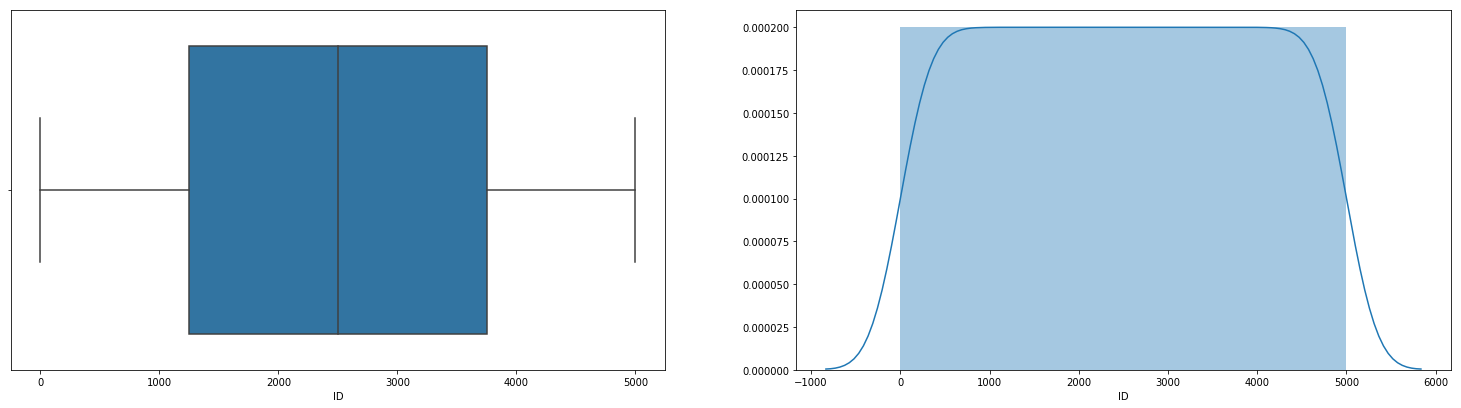

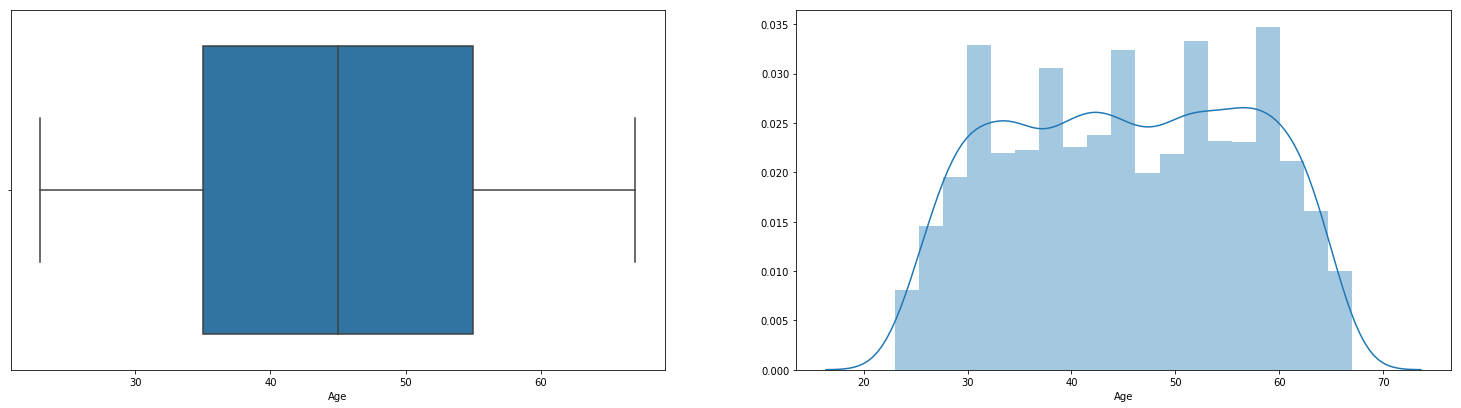

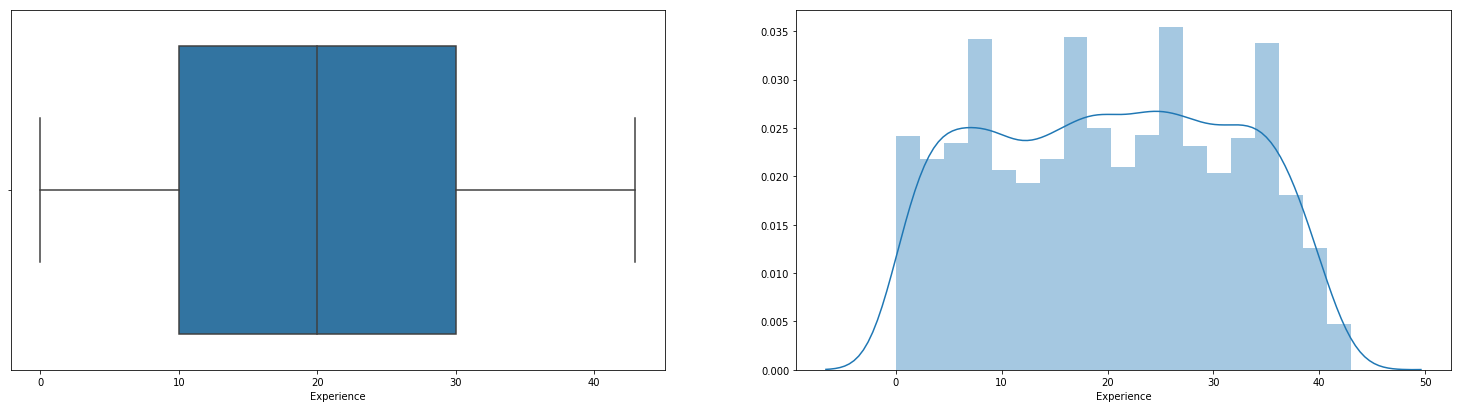

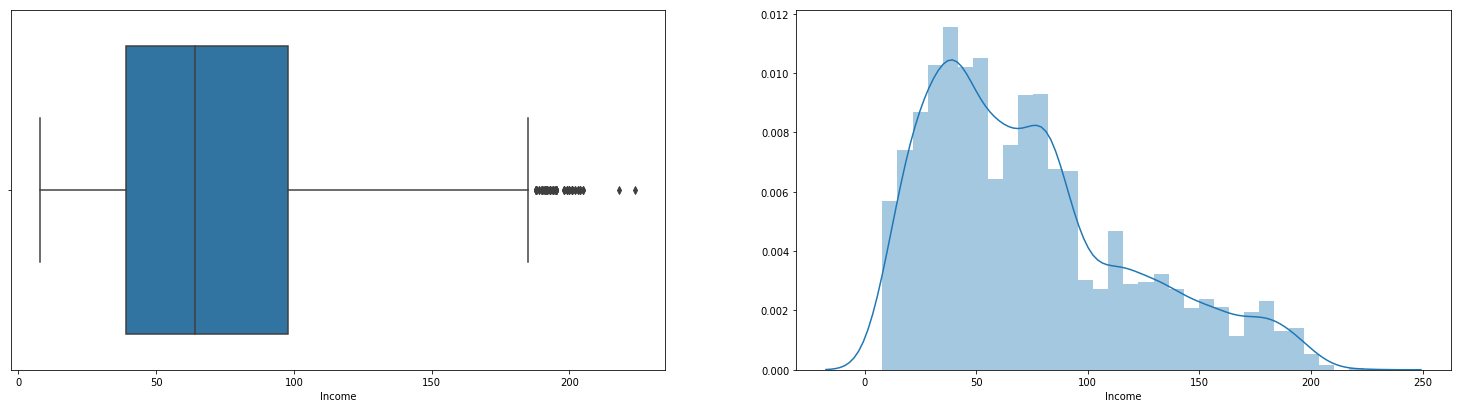

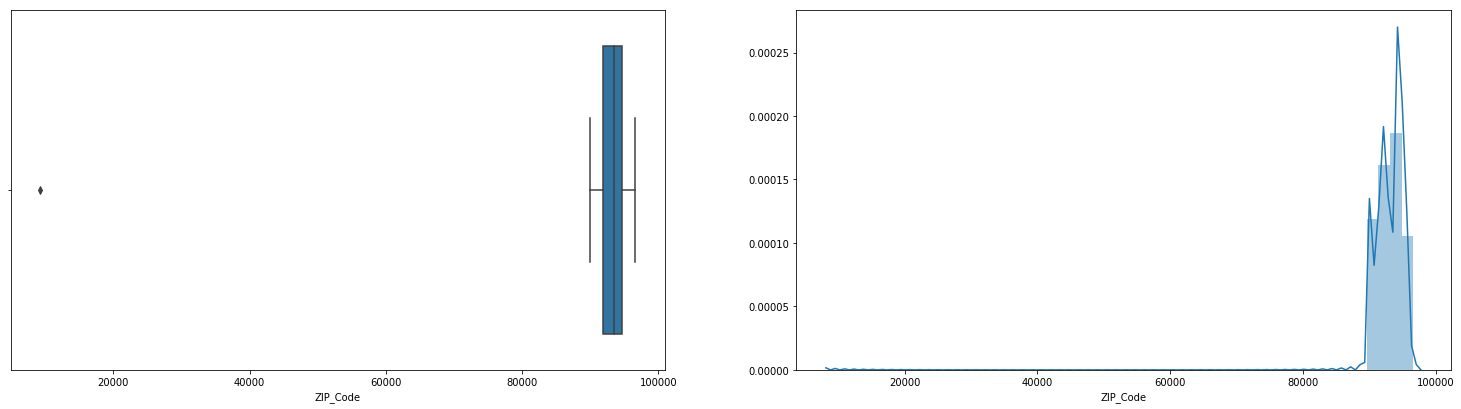

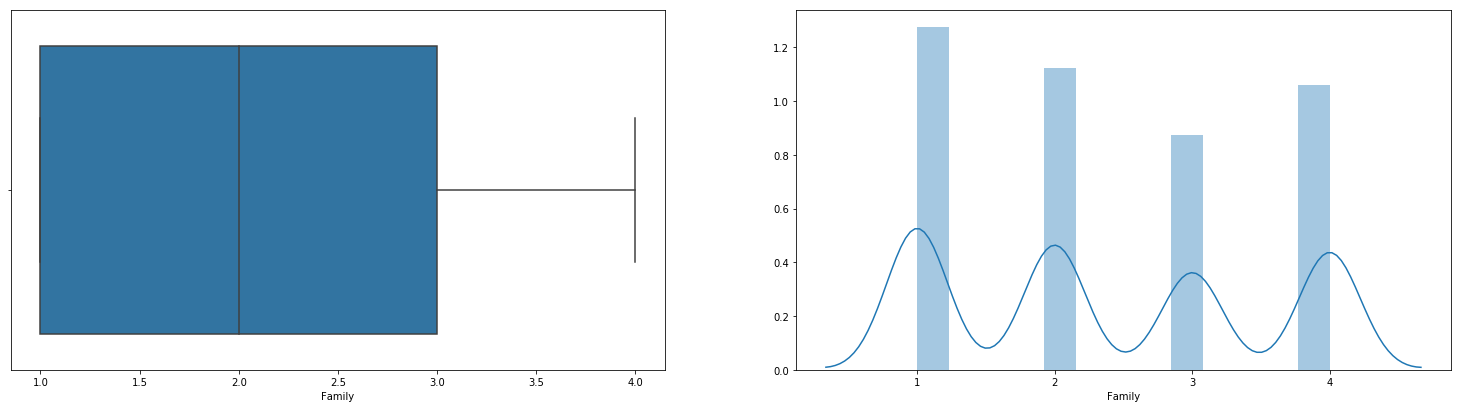

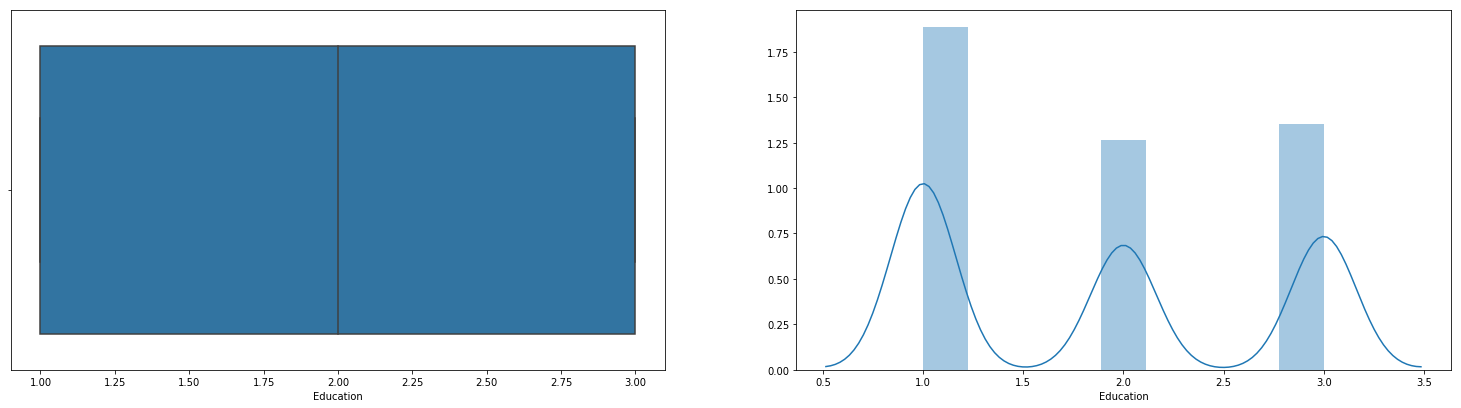

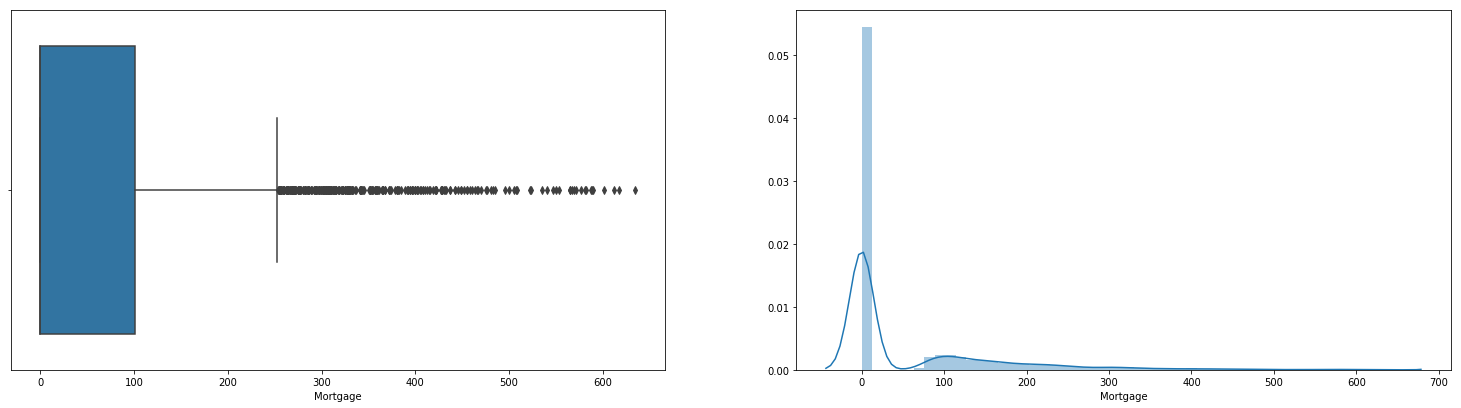

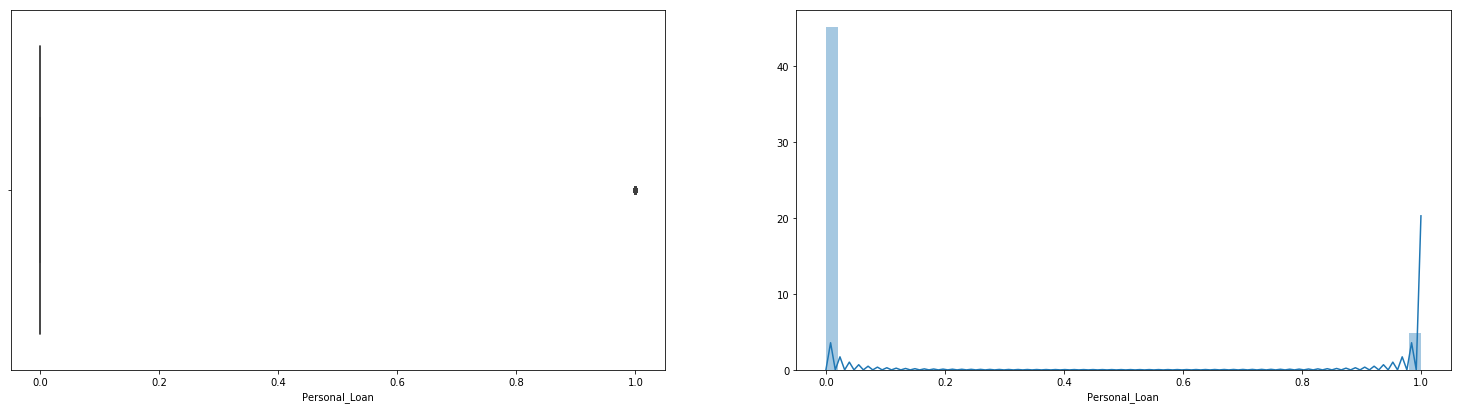

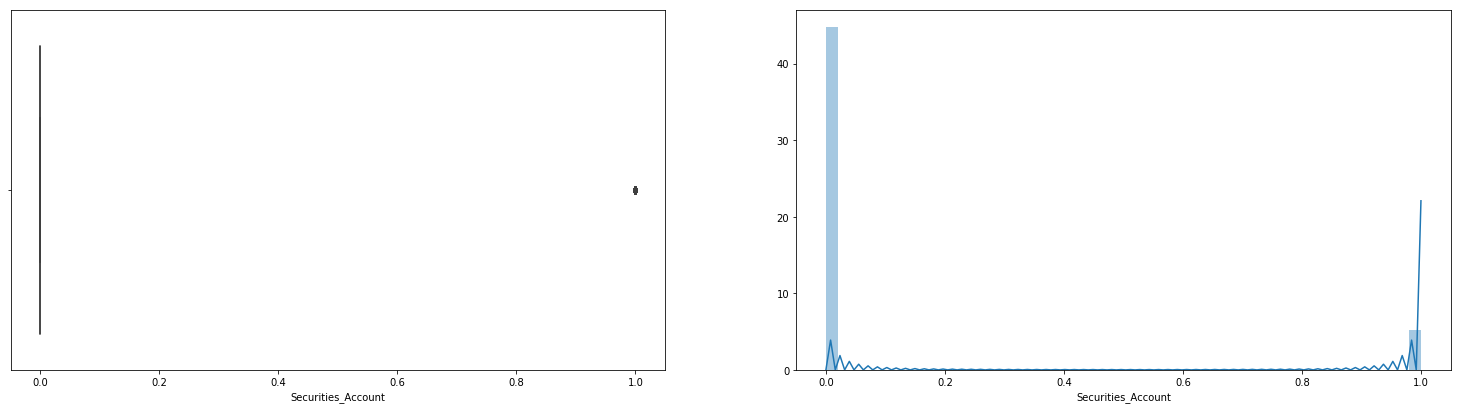

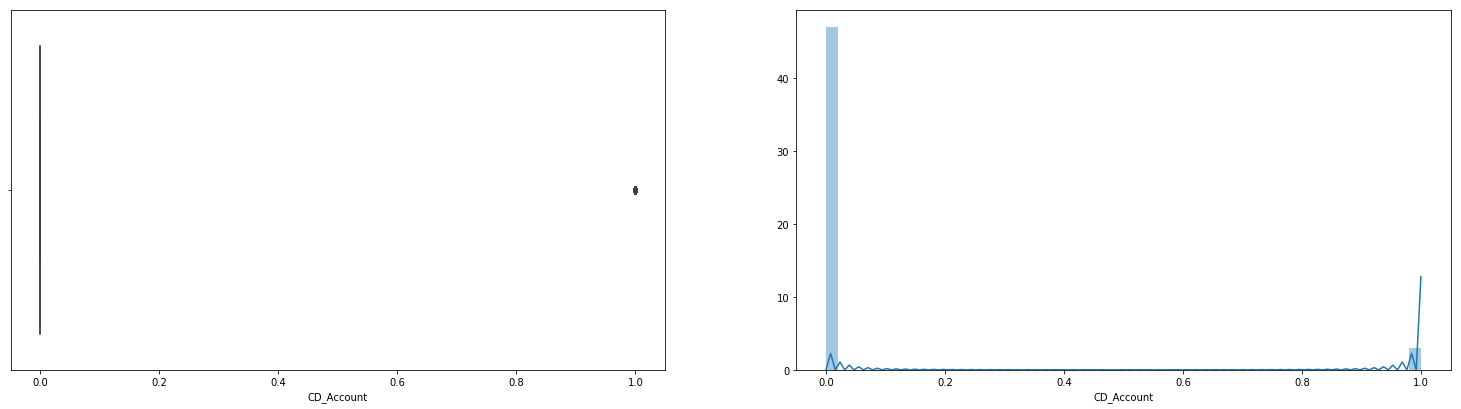

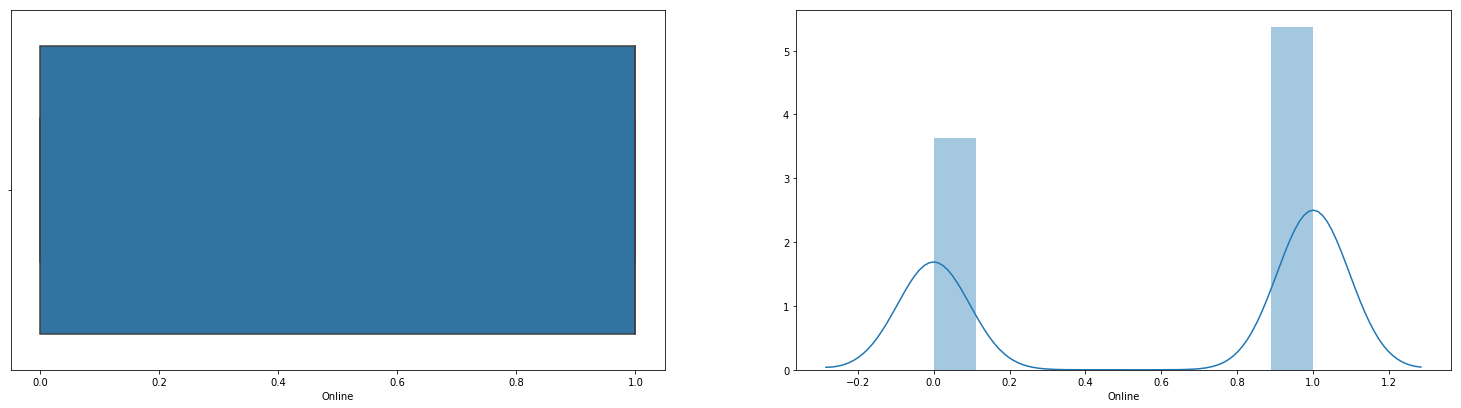

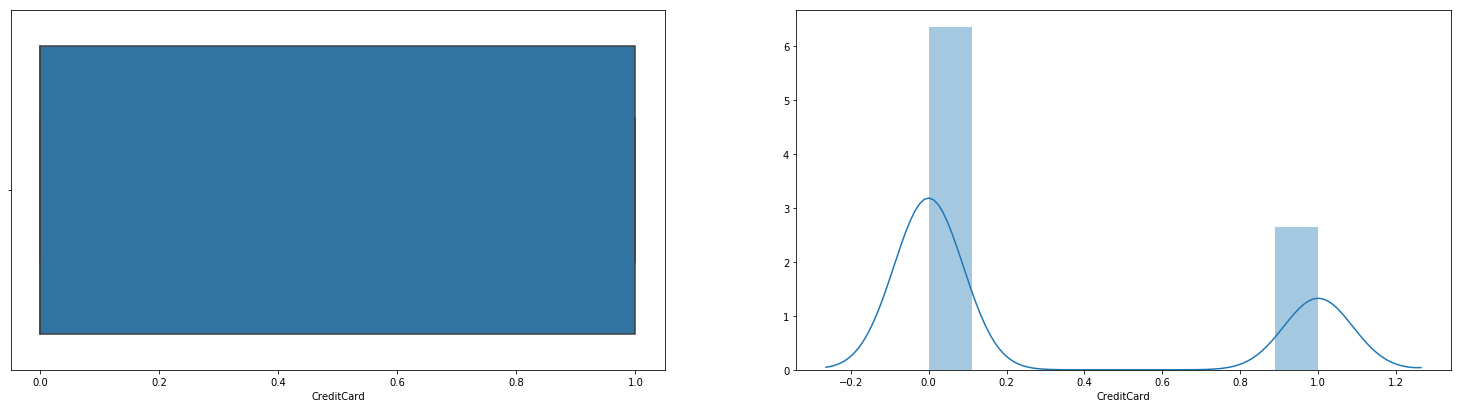

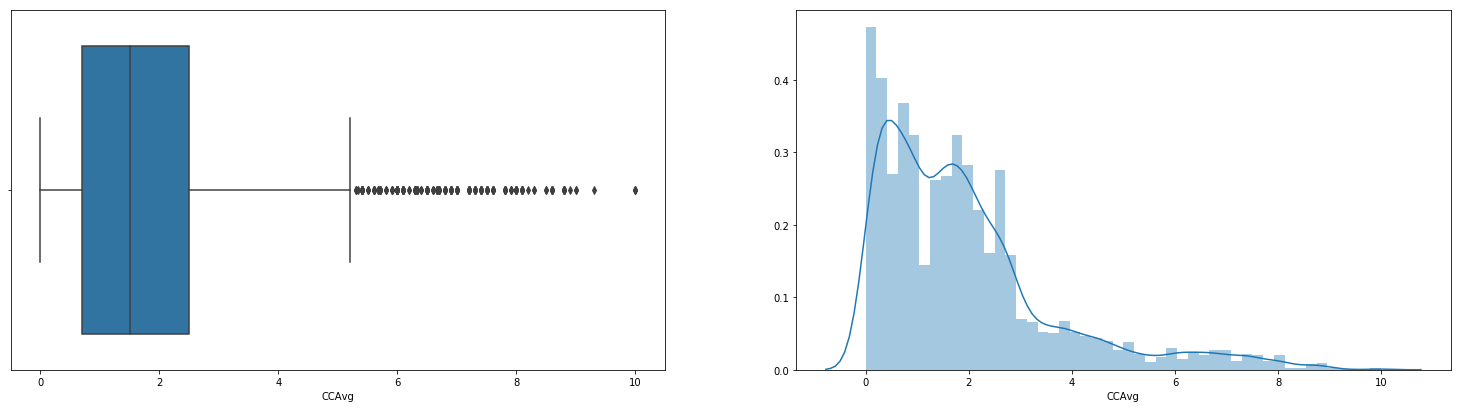

In [17]:
Perform_EDA.univariate_plots(cmp)

Age: looks uniformally distributed from range 25-65 range.
    
Experience: Seem all range of expereince of perople present.
    
Income : Most of customer are from lower income group ,hence data is left skewed.
    
Education:  number cutomer are only Undergrad are high.
    
Mortgage: Most of customer having no  Mortgage.
    
Personal Loan:  data is skewed towards customer having 0 peronal loan.
    
Online: there is high number of customer do online banking.
    
CC : less Number of cutomer uses CC.
    
CC Avg: Data is skwed towards less CCAVg monthly spending for more customer.

In [18]:
cmp.groupby('Personal_Loan').count()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Personal Loan: data is skewed towards customer having 0(No personal Loan) peronal loan.

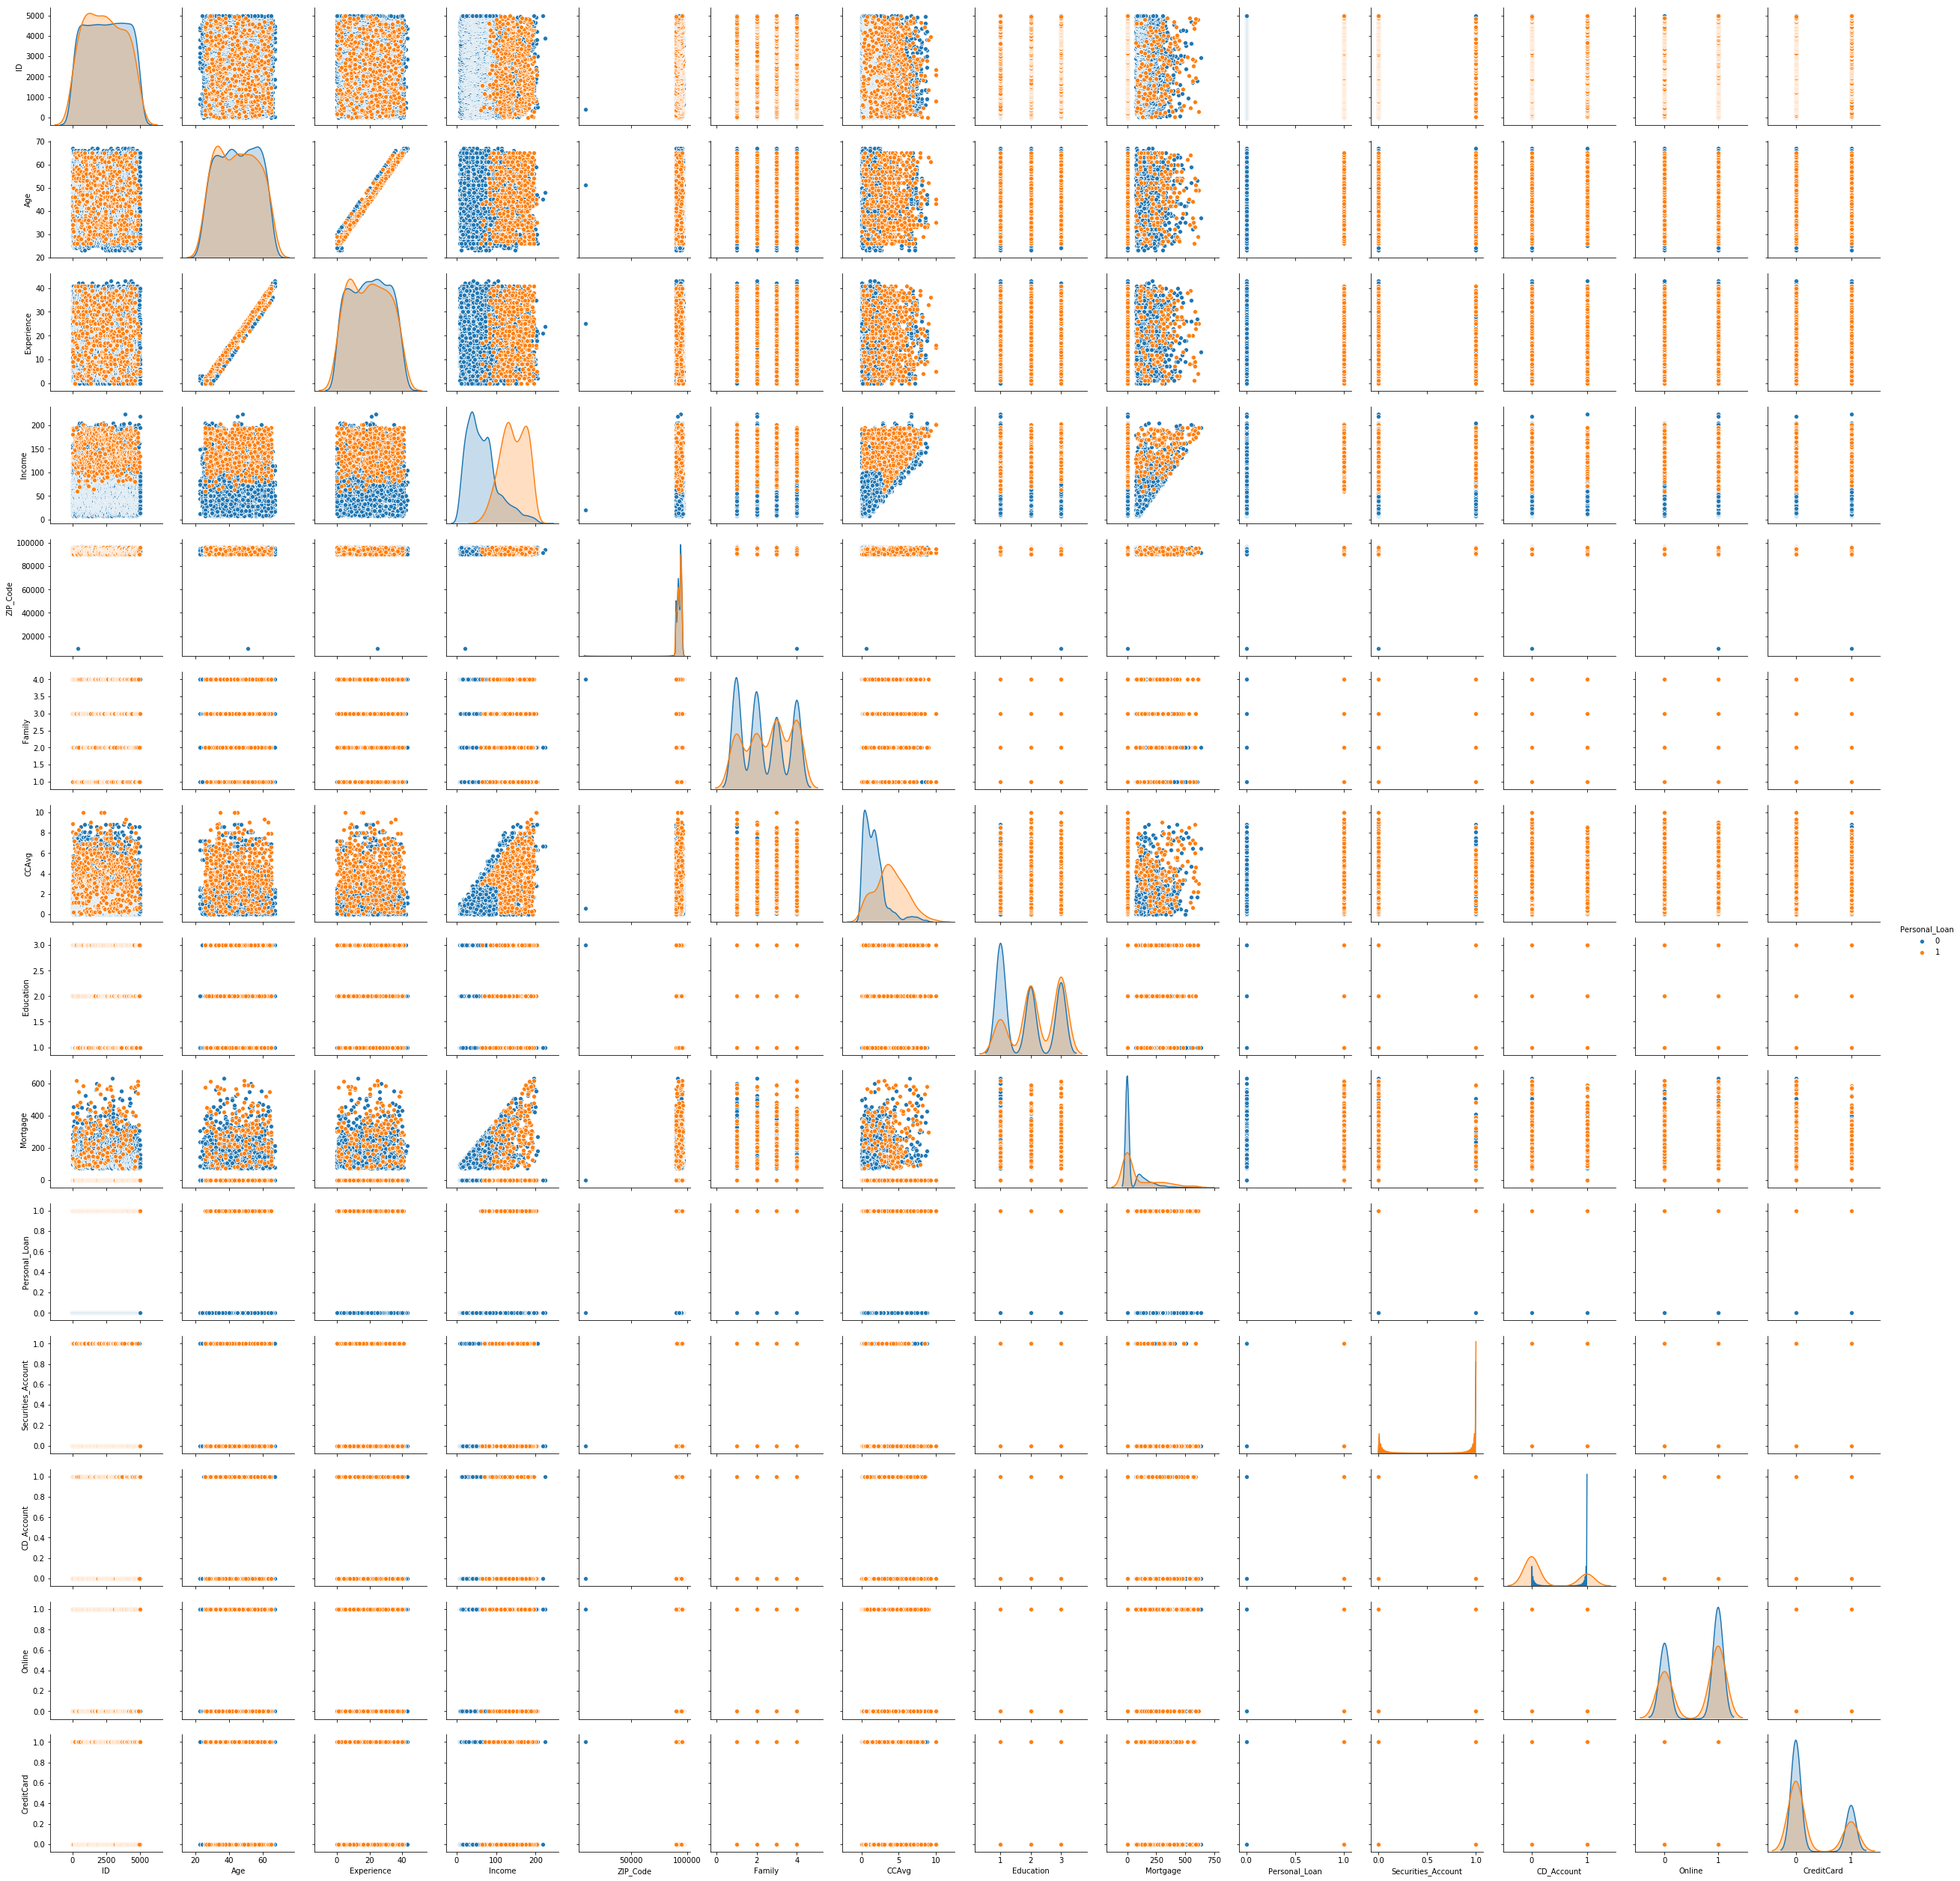

In [19]:
sns.pairplot(cmp,hue='Personal_Loan')

#Pairplot Observation
1. Age is Experience is positively co-related
2. Customer with higher income tend to take loan more.
3. Customer with high income tend to have higher mortgage.
4. Customer with high income tend to have higher CCAvg spending.

#All above observation need to analyze deeply further with various plot.

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
0,ID,13,1,0,[ID],[],"[Age, Experience, Income, ZIP_Code, Family, CC..."
1,Age,12,2,0,"[Age, Experience]",[],"[ID, Income, ZIP_Code, Family, CCAvg, Educatio..."
2,Experience,12,2,0,"[Age, Experience]",[],"[ID, Income, ZIP_Code, Family, CCAvg, Educatio..."
3,Income,11,3,0,"[Income, CCAvg, Personal_Loan]",[],"[ID, Age, Experience, ZIP_Code, Family, Educat..."
4,ZIP_Code,13,1,0,[ZIP_Code],[],"[ID, Age, Experience, Income, Family, CCAvg, E..."
5,Family,13,1,0,[Family],[],"[ID, Age, Experience, Income, ZIP_Code, CCAvg,..."
6,CCAvg,12,2,0,"[Income, CCAvg]",[],"[ID, Age, Experience, ZIP_Code, Family, Educat..."
7,Education,13,1,0,[Education],[],"[ID, Age, Experience, Income, ZIP_Code, Family..."
8,Mortgage,13,1,0,[Mortgage],[],"[ID, Age, Experience, Income, ZIP_Code, Family..."
9,Personal_Loan,12,2,0,"[Income, Personal_Loan]",[],"[ID, Age, Experience, ZIP_Code, Family, CCAvg,..."


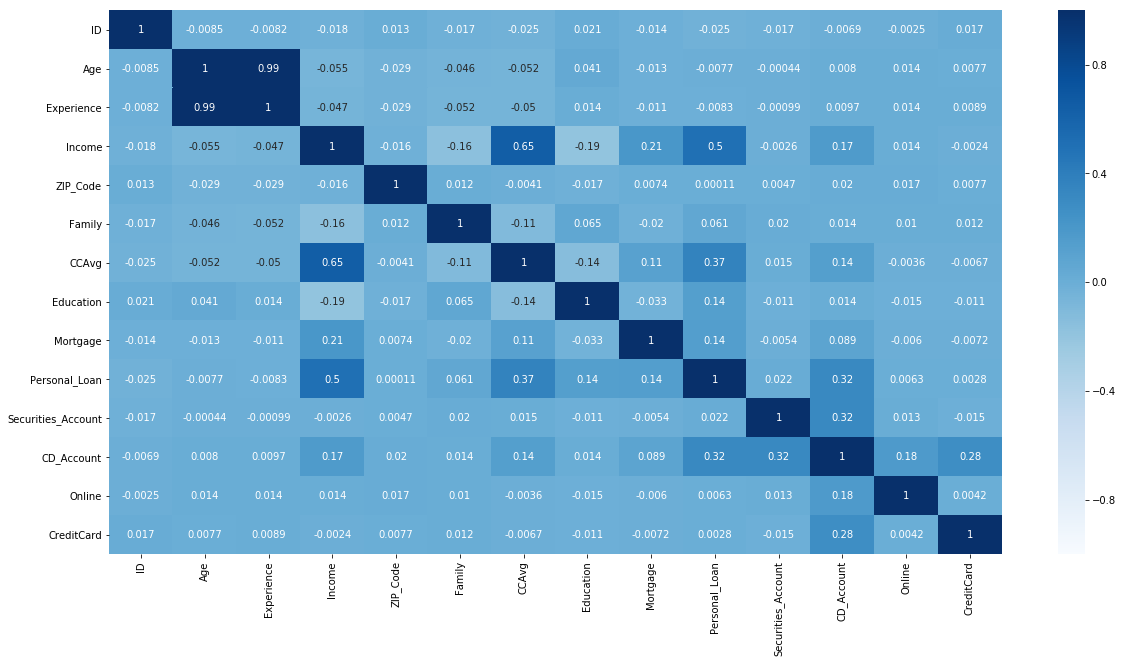

In [20]:
Perform_EDA.EDA_Corr(cmp)

In [21]:
cmp.groupby('Personal_Loan').count()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


#Data is skewed towards with people who didn't took loan but this is sample from previous campaign where only 9% people took 
loan hence data is correct to analyze.

In [22]:
#CCAvg is posiively co-related to Income.
#Income is also posiively co-related to Personal Loan.

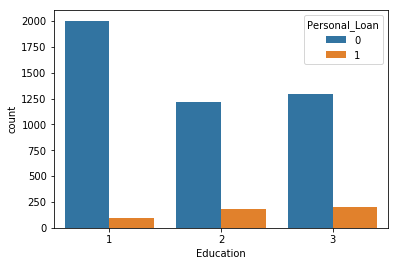

In [23]:
sns.countplot(data=cmp,x='Education',hue='Personal_Loan')

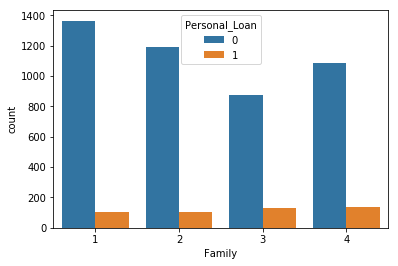

In [24]:
sns.countplot(data=cmp,x='Family',hue='Personal_Loan')

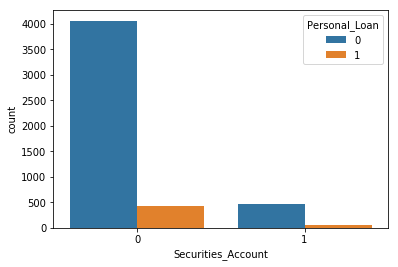

In [25]:
sns.countplot(data=cmp,x='Securities_Account',hue='Personal_Loan')

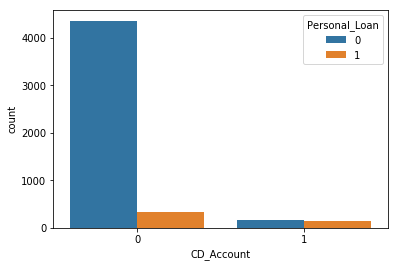

In [26]:
sns.countplot(data=cmp,x='CD_Account',hue='Personal_Loan')

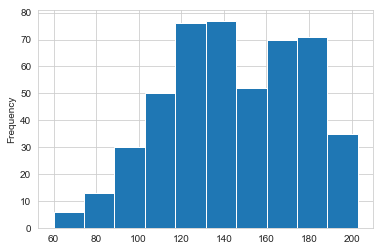

In [27]:
sns.set_style('whitegrid')

PL_with_income=cmp[cmp.Personal_Loan==1]
df = PL_with_income.groupby(['ID'])['Income'].sum().reset_index()

NPL_with_income=cmp[cmp.Personal_Loan==0]
df1 = NPL_with_income.groupby(['ID'])['Income'].sum().reset_index()


df['Income'].plot(kind='hist')

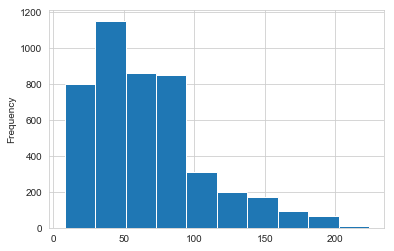

In [28]:
df1['Income'].plot(kind='hist')
#Person who has high Income tend to take loan

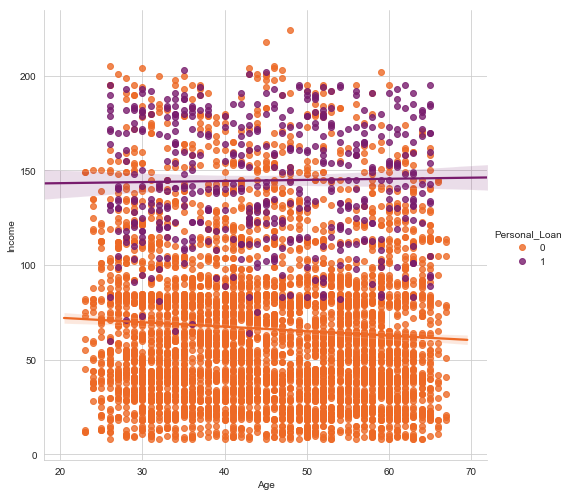

In [29]:
sns.lmplot(x='Age',y='Income',hue='Personal_Loan',data=cmp,palette='inferno_r',size=7)

Ho :  Income having affetct who take loan

Ha : Income having not affetct who take loan

In [30]:
cmp.groupby('Personal_Loan').count()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [31]:
NPL=cmp[(cmp['Personal_Loan'] == 0)].Income.iloc[:-4419]
PL=cmp[(cmp['Personal_Loan'] == 1)].Income.iloc[:-379]

In [32]:
NPL 
PL

9       180
16      130
18      193
29      119
38      141
       ... 
1007     99
1014    192
1022    118
1024    122
1028    110
Name: Income, Length: 101, dtype: int64

In [33]:
v1, v2 = np.var(PL) , np.var(NPL)
print(v1,v2)

1031.765317125772 1561.3192824232908


In [34]:
n = 101  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 124.34    # critical chi_squared statistic. From the table 

In [35]:
chi = (dof*v1)/v2
print(chi)
if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject null for Income having affect on taking loan")
else:
    print("Since the test statistic is more than the critical value, we reject the null for Income of person not having affect on taking loan.")
    

66.08291646308184
Since the test statistic is less than the critical value, we fail to reject null for Income having affect on taking loan


#Hypothesis testing

NULL: There is no variation educated Undergraduate taking Loan

Alternate: There is  effect of educated Undergraduate on taking loan.


In [36]:
cmp.groupby('Personal_Loan').count()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [37]:

from scipy.stats import levene, shapiro, f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
f, p = f_oneway(cmp[(cmp['Education'] == 1 ) & (cmp['Personal_Loan']==0)].Personal_Loan,
                      cmp[(cmp['Education'] == 1 ) & (cmp['Personal_Loan']==1)].Personal_Loan)

print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 1.3095711453830738e+19
P value: 0.0 



# Since Value of P < 0.05 =>Alternaive hypothesis

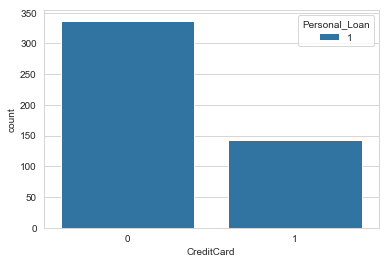

In [38]:
PLD=cmp[cmp.Personal_Loan==1]
sns.countplot(data=PLD,x='CreditCard',hue='Personal_Loan')              

# Build a Logistic Regression Model

In [39]:
colummn

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP_Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [40]:
Y=cmp['Personal_Loan']

In [41]:
X=cmp[['ID','Age','Experience','Income','ZIP_Code','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]

In [42]:
X.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [44]:
X_train.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
4966,4967,41,17,34,91361,1,0.7,1,143,0,0,0,0
4086,4087,50,26,11,93106,4,0.2,1,0,1,0,0,0
2881,2882,49,25,55,92103,4,0.1,3,0,0,0,1,0
1237,1238,38,13,169,92093,1,6.8,3,0,0,1,1,1
1429,1430,31,5,35,95064,1,0.6,3,171,0,0,0,0


In [45]:
Y_train.head()

4966    0
4086    0
2881    0
1237    1
1429    0
Name: Personal_Loan, dtype: int64

In [46]:
logmodel = LogisticRegression()

In [47]:
Logistic_Reg_Model = logmodel.fit(X_train,Y_train)

In [48]:
Logistic_Reg_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = Logistic_Reg_Model.predict(X_test)

In [50]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
Y_test

789     0
2507    0
2376    0
1378    0
598     0
       ..
4276    0
1528    0
4259    1
3686    0
1372    1
Name: Personal_Loan, Length: 1500, dtype: int64

# Evaluate Logistic Regression Model

In [52]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.57      0.30      0.39       158

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



In [53]:
confusion_matrix(Y_test,predictions)

array([[1306,   36],
       [ 111,   47]], dtype=int64)

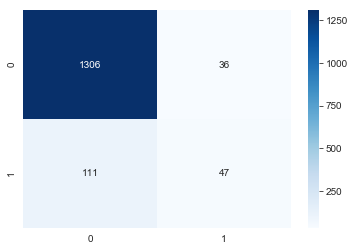

In [54]:
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True, cmap='Blues',fmt='g')

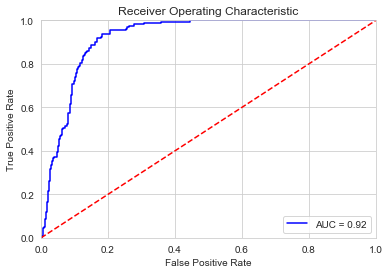

In [55]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Logistic_Reg_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
Logistic_Accuracy = accuracy_score(Y_test,predictions)
Logistic_Accuracy

0.902

In [57]:
Logistic_Gini = 2*roc_auc - 1
Logistic_Gini

0.8415457752457132

In [58]:
Logistic_AUC = roc_auc
Logistic_AUC

0.9207728876228566

# Naive Bayes - Gaussian

In [59]:
Naive = GaussianNB()

In [60]:
Naive_model = Naive.fit(X_train,Y_train)

In [61]:
Naive_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
Naive_predictions = Naive_model.predict(X_test)

In [63]:
Naive_predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Naive Bayes Evaluation

In [64]:
print(classification_report(Y_test,Naive_predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.48      0.62      0.54       158

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.71      0.77      0.74      1500
weighted avg       0.90      0.89      0.89      1500



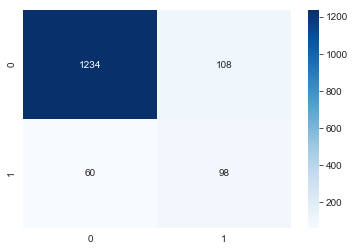

In [65]:
sns.heatmap(confusion_matrix(Y_test,Naive_predictions), annot=True, cmap='Blues',fmt='g')

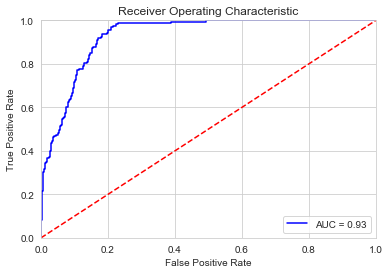

In [66]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Naive_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
Naive_Accuracy = accuracy_score(Y_test,Naive_predictions)
Naive_Accuracy

0.888

In [68]:
Naive_Gini = 2*roc_auc - 1
Naive_Gini

0.8591654247391951

In [69]:
Naive_AUC = roc_auc
Naive_AUC

0.9295827123695976

# KNN Classifier

In [70]:
KNN = KNeighborsClassifier()

In [71]:
KNN_model = KNN.fit(X_train,Y_train)

In [72]:
KNN_predictions = KNN_model.predict(X_test)

In [73]:
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# Choosing N-Neighbors hyper parameter

In [75]:
N = [3,5,7,9,11,13,15,17,19,21,23,25,27,29]

In [76]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in N:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)


In [77]:
pandas.DataFrame(ac_scores,N)

,0
3,0.884000
5,0.890000
7,0.892667
9,0.894667
11,0.894667
13,0.894667
15,0.894667
17,0.894667
19,0.894667
21,0.894667


In [78]:
Dist = [1,2]
ac_scores = []


for k in Dist:
    knn = KNeighborsClassifier(n_neighbors=5,p=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)


In [79]:
pandas.DataFrame(ac_scores,Dist)

,0
1,0.888667
2,0.890000


In [80]:
KNN = KNeighborsClassifier(n_neighbors=9,p=2)

In [81]:
KNN_model = KNN.fit(X_train,Y_train)

In [82]:
KNN_predictions = KNN_model.predict(X_test)

In [83]:
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# KNN Evaluation

In [84]:
print(classification_report(Y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1342
           1       0.00      0.00      0.00       158

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



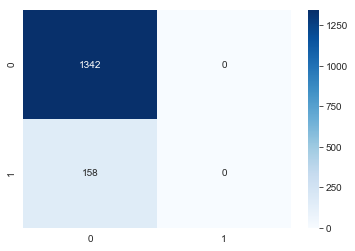

In [85]:
sns.heatmap(confusion_matrix(Y_test,KNN_predictions), annot=True, cmap='Blues',fmt='g')

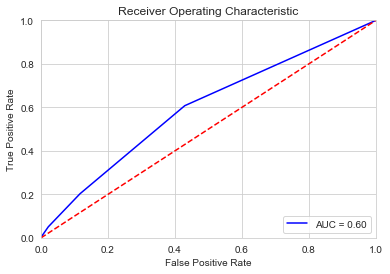

In [86]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = KNN_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
KNN_Accuracy = accuracy_score(Y_test,KNN_predictions)
KNN_Accuracy

0.8946666666666667

In [88]:
KNN_Gini = 2*roc_auc - 1
KNN_Gini

0.19624026108773984

In [89]:
KNN_AUC = roc_auc
KNN_AUC

0.5981201305438699

In [90]:
print("Logisitc Regression accuracy  %f" % Logistic_Accuracy)
print("Naive_Accuracy accuracy  %f" % Naive_Accuracy)
print("KNN_Accuracy accuracy  %f" % KNN_Accuracy)

Logisitc Regression accuracy  0.902000
Naive_Accuracy accuracy  0.888000
KNN_Accuracy accuracy  0.894667


# Let perform some Normalization and Resampling

# KNN after Normalization and Resampling

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
X_test

array([[0.15766307, 0.13636364, 0.06976744, ..., 0.        , 1.        ,
        0.        ],
       [0.50140056, 0.81818182, 0.79069767, ..., 0.        , 1.        ,
        1.        ],
       [0.47519008, 0.79545455, 0.76744186, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.85194078, 0.65909091, 0.60465116, ..., 0.        , 0.        ,
        1.        ],
       [0.73729492, 0.84090909, 0.81395349, ..., 0.        , 0.        ,
        0.        ],
       [0.27430972, 0.36363636, 0.30232558, ..., 0.        , 1.        ,
        0.        ]])

In [93]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [94]:
KNN_model = knn_gscv.fit(X_train,Y_train)

In [95]:
KNN_predictions = KNN_model.predict(X_test)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
N = [3,5,7,9,11,13,15,17,19,21,23,25,27,29]

In [97]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in N:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)


In [98]:
pandas.DataFrame(ac_scores,N)

,0
3,0.950667
5,0.947333
7,0.939333
9,0.936667
11,0.933333
13,0.930667
15,0.930667
17,0.926000
19,0.926000
21,0.925333


In [99]:
Dist = [1,2]
ac_scores = []


for k in Dist:
    knn = KNeighborsClassifier(n_neighbors=5,p=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)


In [100]:
pandas.DataFrame(ac_scores,Dist)

,0
1,0.943333
2,0.947333


In [101]:
KNN = KNeighborsClassifier(n_neighbors=3,p=2)

In [102]:
KNN_model = KNN.fit(X_train,Y_train)

In [103]:
KNN_predictions = KNN_model.predict(X_test)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

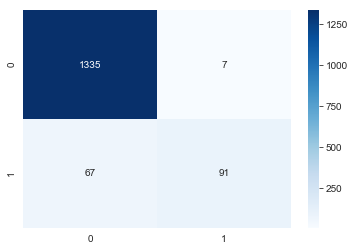

In [104]:
sns.heatmap(confusion_matrix(Y_test,KNN_predictions), annot=True, cmap='Blues',fmt='g')

In [105]:
print(classification_report(Y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.93      0.58      0.71       158

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



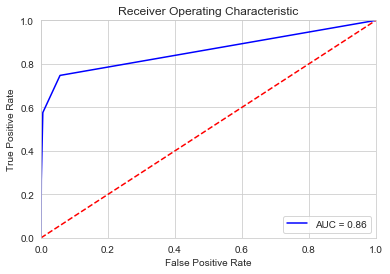

In [106]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = KNN_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
KNN_Accuracy_After = accuracy_score(Y_test,KNN_predictions)
KNN_Accuracy_After

0.9506666666666667

In [108]:
KNN_Gini_After = 2*roc_auc - 1
KNN_Gini_After

0.7198824727876396

In [109]:
KNN_AUC_After = roc_auc
KNN_AUC_After

0.8599412363938198

# Logistic_Reg_Model after Normalization and Resampling

In [110]:
Logistic_Reg_Model = logmodel.fit(X_train,Y_train)
Logistic_Reg_Model
predictions = Logistic_Reg_Model.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.86      0.51      0.64       158

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.90      0.75      0.81      1500
weighted avg       0.94      0.94      0.93      1500



In [112]:
confusion_matrix(Y_test,predictions)

array([[1329,   13],
       [  77,   81]], dtype=int64)

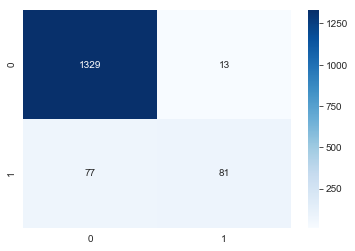

In [113]:
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True, cmap='Blues',fmt='g')

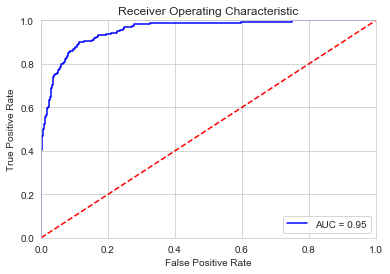

In [114]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Logistic_Reg_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
Logistic_Accuracy_After = accuracy_score(Y_test,predictions)
Logistic_Accuracy_After

0.94

In [116]:
Logistic_Gini_After = 2*roc_auc - 1
Logistic_Gini_After

0.9097417419683449

In [117]:
Logistic_AUC_After = roc_auc
Logistic_AUC_After

0.9548708709841724

# Naivb-base after Normalization and Resampling

In [118]:
Naive_model = Naive.fit(X_train,Y_train)
Naive_model
Naive_predictions = Naive_model.predict(X_test)
Naive_predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [119]:
print(classification_report(Y_test,Naive_predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1342
           1       0.46      0.61      0.52       158

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.88      0.89      1500



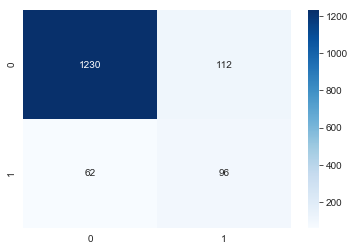

In [120]:
sns.heatmap(confusion_matrix(Y_test,Naive_predictions), annot=True, cmap='Blues',fmt='g')

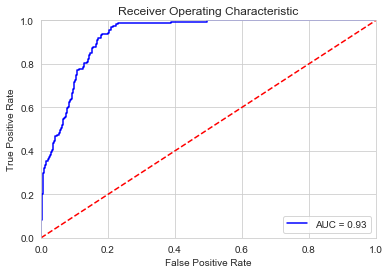

In [121]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Naive_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [122]:
Naive_Accuracy_After = accuracy_score(Y_test,Naive_predictions)
Naive_Accuracy

0.888

In [123]:
Naive_Gini_After = 2*roc_auc - 1
Naive_Gini_After

0.8567224433586749

In [124]:
Naive_AUC_After = roc_auc
Naive_AUC_After

0.9283612216793374

In [126]:
print("Logisitc Regression before normalisation accuracy  %f" % Logistic_Accuracy)
print("Naive_Accuracy before normalisation accuracy  %f" % Naive_Accuracy)
print("KNN_Accuracy before normalisation accuracy  %f" % KNN_Accuracy)
print("Logisitc Regression after normalisation  accuracy  %f" % Logistic_Accuracy_After)
print("Naive_Accuracy after normalisation  accuracy  %f" % Naive_Accuracy_After)
print("KNN_Accuracy after normalisation  accuracy  %f" % KNN_Accuracy_After)

Logisitc Regression before normalisation accuracy  0.902000
Naive_Accuracy before normalisation accuracy  0.888000
KNN_Accuracy before normalisation accuracy  0.894667
Logisitc Regression after normalisation  accuracy  0.940000
Naive_Accuracy after normalisation  accuracy  0.884000
KNN_Accuracy after normalisation  accuracy  0.950667


# Conclusion: 
KNN accuracy is improved after Grid search.
Logistic and KNN accuracy are improved maximum while there is no improvment in Naive Base accuracy after normalisation.
KNN performs best after gridsearch and Re-sampling/regularisation.Normlisation and Gridsearch help to improve accuracy a lot in this case compare to other model and type I and type II error is also less for KNN.